<a href="https://colab.research.google.com/github/prarthana127/Clustering-Comparitive-Study/blob/main/Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture



In [ ]:
df = pd.read_csv('/content/ObesityDataSet_raw_and_data_sinthetic.csv')
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [ ]:
# Get number of rows and columns
num_rows, num_columns = df.shape
print(f"Number of rows: {num_rows}")

Number of rows: 2111


In [ ]:
# Encode categorical variables
categorical_cols = df.select_dtypes(include='object').columns
label_encoders = {col: LabelEncoder().fit(df[col]) for col in categorical_cols}
for col, le in label_encoders.items():
    df[col] = le.transform(df[col])

data = df.drop(columns=['NObeyesdad'])  # Drop target



In [ ]:
subcluster_sizes = [3, 4, 5]  # Number of clusters to test

# Define clustering algorithms
clustering_algorithms = {
    'KMeans': KMeans,
    'Agglomerative': AgglomerativeClustering,
    'GMM': GaussianMixture
}

# List of preprocessing methods to apply
processing_methods = ['No Data Processing', 'Normalization', 'Transformation', 'PCA', 'T+N', 'T+N+PCA']

# Placeholder for the processed results
results_kmeans = []
results_agglo = []
results_gmm = []


In [ ]:
# Loop through different clustering algorithms
for algorithm_name, algorithm in clustering_algorithms.items():
    # Loop through different data processing methods
    for processing_method in processing_methods:
        for subcluster_size in subcluster_sizes:
            # Apply data processing based on the method
            processed_data = data.copy()  # Assume no processing by default

            if processing_method == 'No Data Processing':
                processed_data = data.copy()  # No preprocessing

            elif processing_method == 'Normalization':
                scaler = MinMaxScaler()
                processed_data = scaler.fit_transform(data)

            elif processing_method == 'Transformation':
                scaler = StandardScaler()
                processed_data = scaler.fit_transform(data)

            elif processing_method == 'PCA':
                pca = PCA(n_components=min(subcluster_size, data.shape[1]))
                processed_data = pca.fit_transform(data)

            elif processing_method == 'T+N':
                # Apply MinMaxScaler (Normalization) first
                scaler = MinMaxScaler()
                transformed_data = scaler.fit_transform(data)
                processed_data = transformed_data

            elif processing_method == 'T+N+PCA':
                # Apply Transformation (StandardScaler) + Normalization (MinMaxScaler) + PCA
                scaler = MinMaxScaler()
                transformed_data = scaler.fit_transform(data)
                pca = PCA(n_components=min(subcluster_size, data.shape[1]))
                processed_data = pca.fit_transform(transformed_data)

            # Now perform clustering on the processed data
            model = algorithm(n_clusters=subcluster_size) if algorithm_name != 'GMM' else algorithm(n_components=subcluster_size)
            labels = model.fit_predict(processed_data)

            # Calculate evaluation metrics
            silhouette = silhouette_score(processed_data, labels)
            db_index = davies_bouldin_score(processed_data, labels)
            ch_score = calinski_harabasz_score(processed_data, labels)

            # Store the results based on the algorithm
            result = [algorithm_name, processing_method, subcluster_size, silhouette, db_index, ch_score]
            if algorithm_name == 'KMeans':
                results_kmeans.append(result)
            elif algorithm_name == 'Agglomerative':
                results_agglo.append(result)
            elif algorithm_name == 'GMM':
                results_gmm.append(result)

# Convert results into DataFrame for easy viewing
columns = ['Algorithm', 'Processing Method', 'Clusters', 'Silhouette Score', 'Davies-Bouldin Index', 'Calinski-Harabasz Score']

# Create DataFrames for each algorithm
df_kmeans = pd.DataFrame(results_kmeans, columns=columns)
df_agglo = pd.DataFrame(results_agglo, columns=columns)
df_gmm = pd.DataFrame(results_gmm, columns=columns)


In [ ]:

# Display the results for each algorithm
print("🔹 KMeans Results")
display(df_kmeans.sort_values(by='Silhouette Score', ascending=False))

print("🔹 Agglomerative Clustering Results")
display(df_agglo.sort_values(by='Silhouette Score', ascending=False))

print("🔹 Gaussian Mixture Model (GMM) Results")
display(df_gmm.sort_values(by='Silhouette Score', ascending=False))

🔹 KMeans Results


,Algorithm,Processing Method,Clusters,Silhouette Score,Davies-Bouldin Index,Calinski-Harabasz Score
15,KMeans,T+N+PCA,3,0.521461,0.837441,1944.154392
9,KMeans,PCA,3,0.510010,0.657498,4794.872472
0,KMeans,No Data Processing,3,0.501638,0.666051,4674.650641
10,KMeans,PCA,4,0.480160,0.691594,4873.585302
1,KMeans,No Data Processing,4,0.474969,0.782704,3689.656555
2,KMeans,No Data Processing,5,0.474348,0.746407,4453.726961
16,KMeans,T+N+PCA,4,0.438648,1.054622,1147.566828
11,KMeans,PCA,5,0.434514,0.750587,4394.574855
17,KMeans,T+N+PCA,5,0.289296,1.257055,779.322847
4,KMeans,Normalization,4,0.245043,1.664656,419.960951


🔹 Agglomerative Clustering Results


,Algorithm,Processing Method,Clusters,Silhouette Score,Davies-Bouldin Index,Calinski-Harabasz Score
15,Agglomerative,T+N+PCA,3,0.519617,0.847834,1905.175154
0,Agglomerative,No Data Processing,3,0.474098,0.704879,4264.762095
9,Agglomerative,PCA,3,0.473603,0.700782,4258.304727
1,Agglomerative,No Data Processing,4,0.465687,0.672363,4319.296981
10,Agglomerative,PCA,4,0.465537,0.723418,4583.889564
17,Agglomerative,T+N+PCA,5,0.431239,1.052378,842.095434
16,Agglomerative,T+N+PCA,4,0.426237,1.106644,1113.511162
2,Agglomerative,No Data Processing,5,0.414848,0.783838,4140.564864
11,Agglomerative,PCA,5,0.411027,0.734292,4123.395285
4,Agglomerative,Normalization,4,0.234486,1.907984,386.946106


🔹 Gaussian Mixture Model (GMM) Results


,Algorithm,Processing Method,Clusters,Silhouette Score,Davies-Bouldin Index,Calinski-Harabasz Score
15,GMM,T+N+PCA,3,0.500864,0.929093,1760.732793
16,GMM,T+N+PCA,4,0.430939,1.095423,1135.671977
17,GMM,T+N+PCA,5,0.291923,1.531364,744.458971
9,GMM,PCA,3,0.248309,1.429331,1280.762937
14,GMM,T+N,5,0.248192,1.709274,340.543367
12,GMM,T+N,3,0.242937,1.631759,514.135752
13,GMM,T+N,4,0.228545,2.250924,332.235212
3,GMM,Normalization,3,0.226263,1.914731,450.518694
4,GMM,Normalization,4,0.211473,1.721792,351.961028
5,GMM,Normalization,5,0.204812,1.813836,345.829621


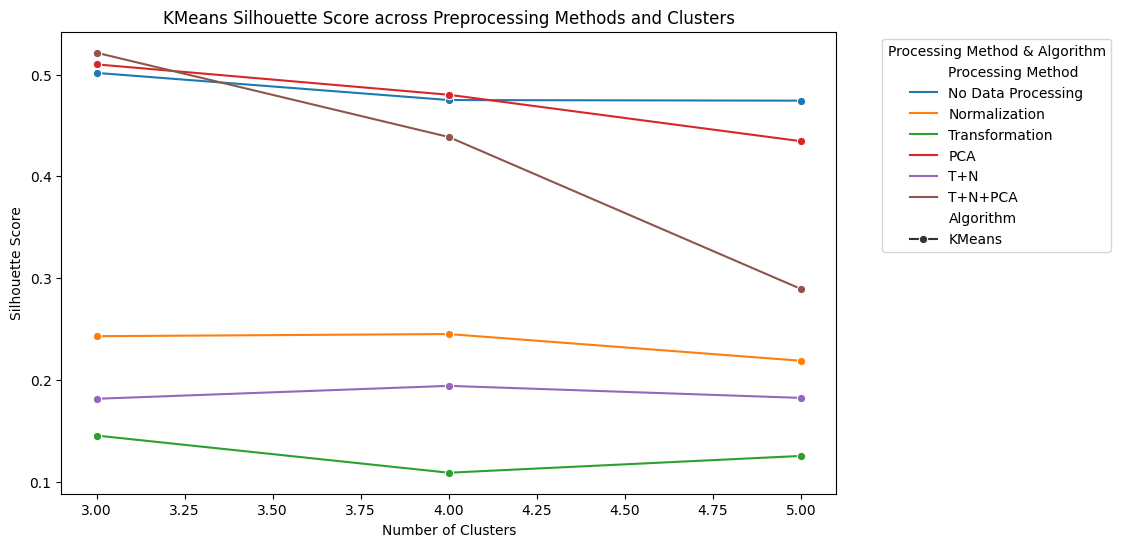

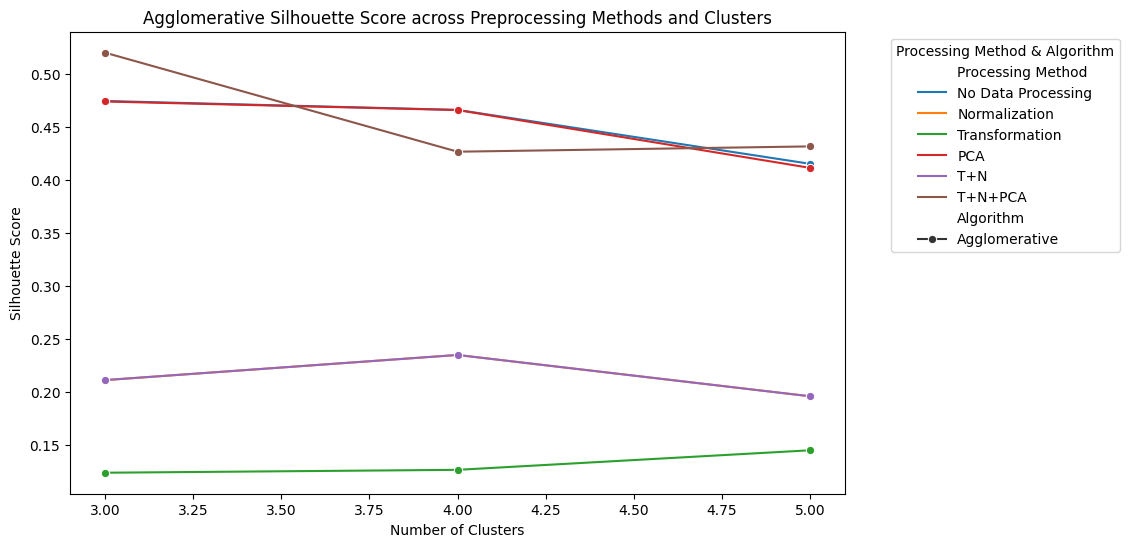

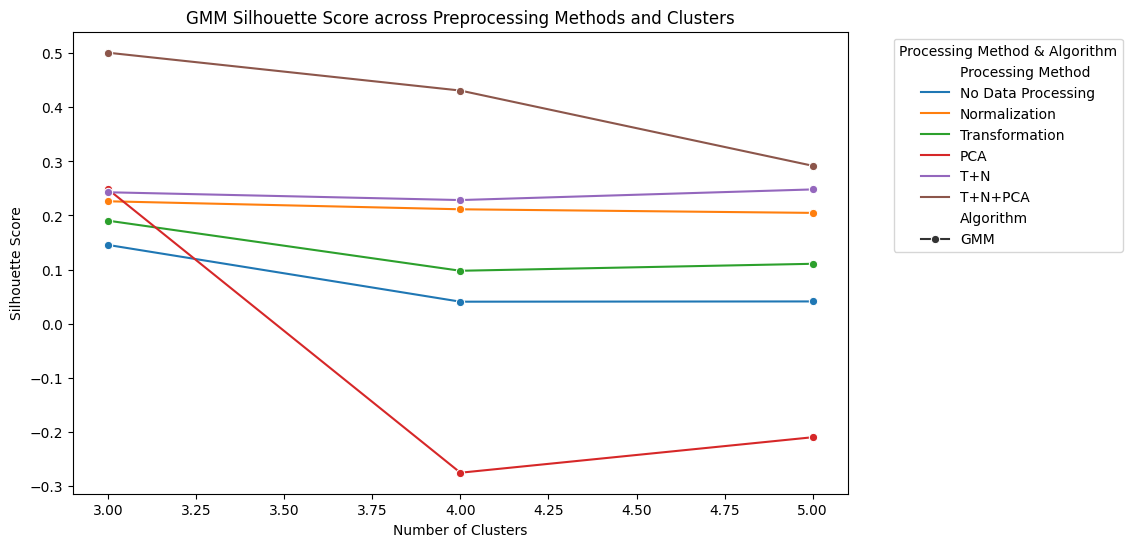

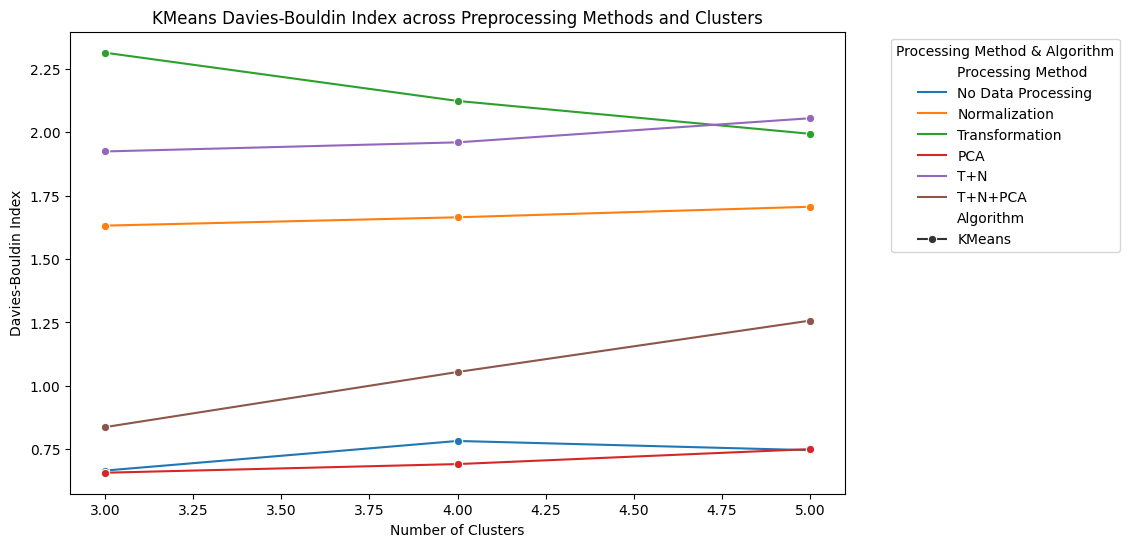

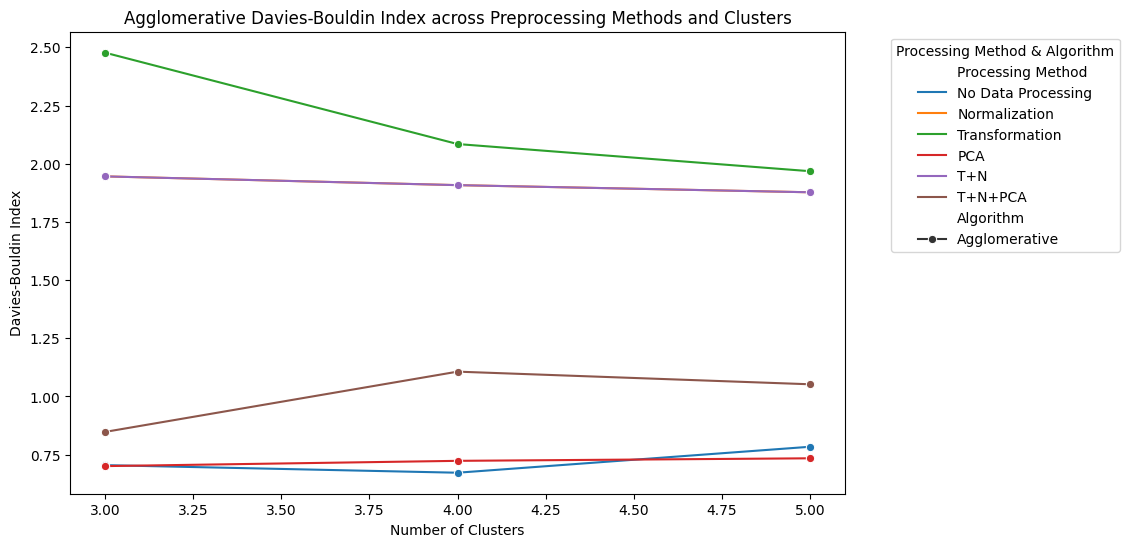

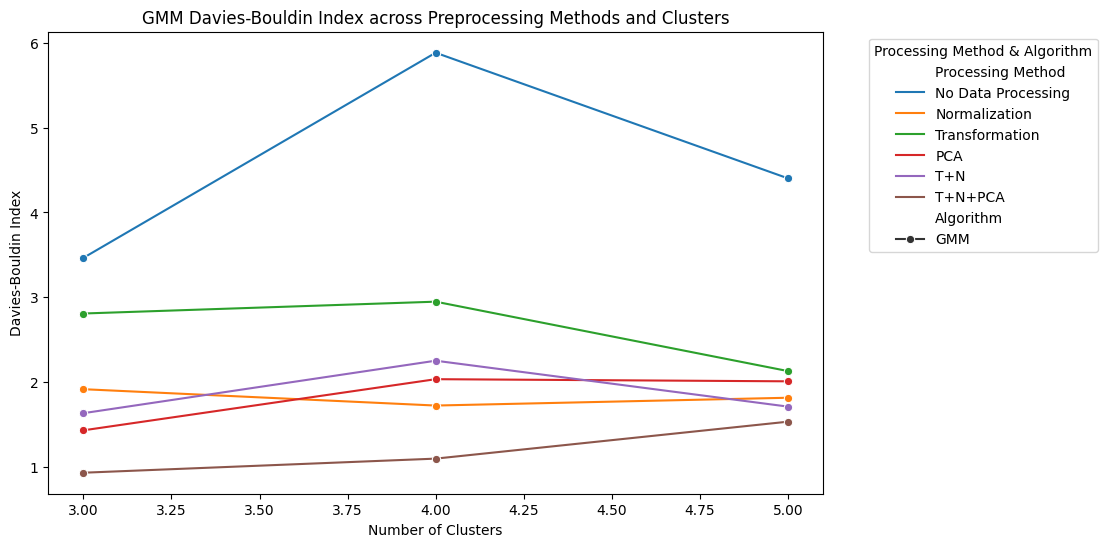

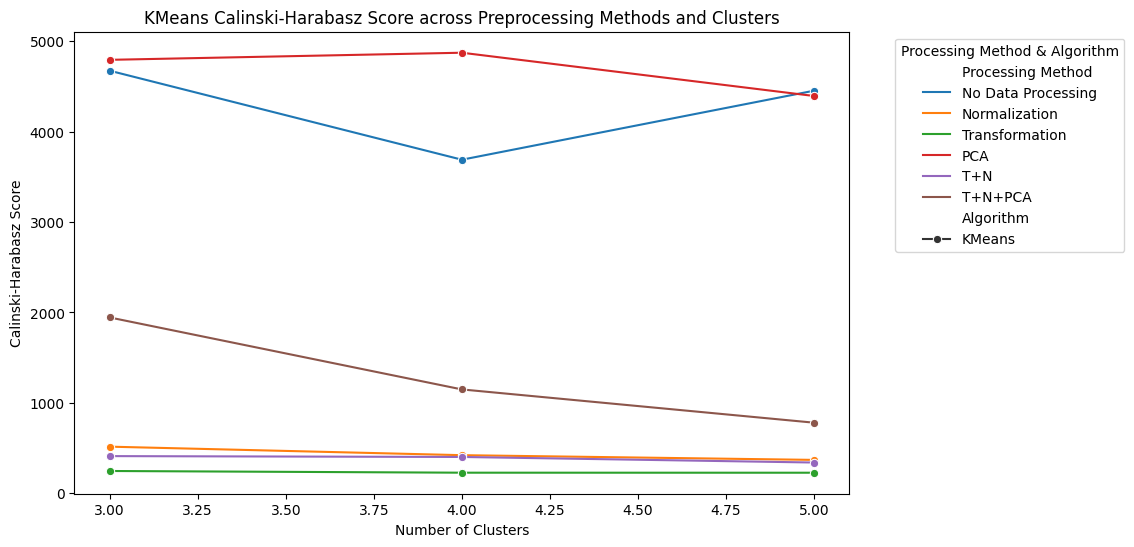

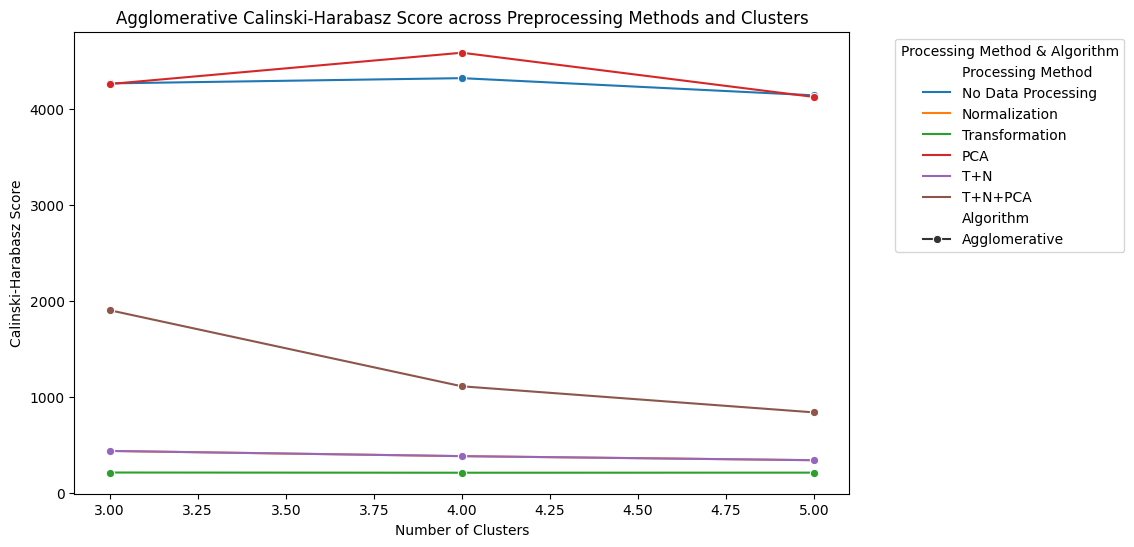

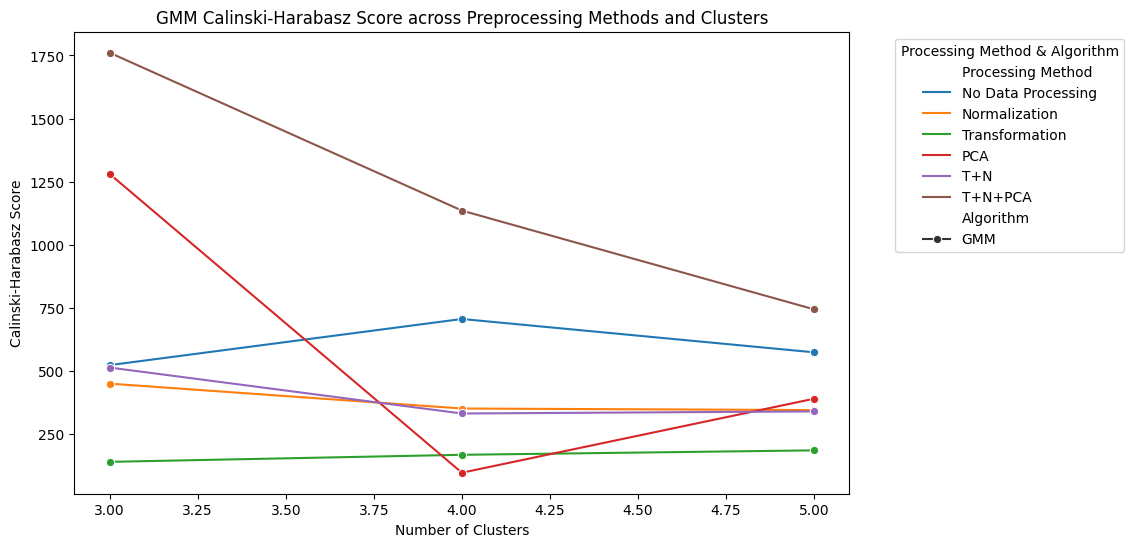

In [ ]:
# Import necessary libraries for visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Function to generate line charts comparing scores across preprocessing + algorithms + clusters
def plot_results(df, metric, title):
    plt.figure(figsize=(10, 6))
    sns.lineplot(data=df, x="Clusters", y=metric, hue="Processing Method", style="Algorithm", markers=True)
    plt.title(title)
    plt.xlabel("Number of Clusters")
    plt.ylabel(metric)
    plt.legend(title="Processing Method & Algorithm", bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()

# Line charts for each metric
# Silhouette Score
plot_results(df_kmeans, 'Silhouette Score', "KMeans Silhouette Score across Preprocessing Methods and Clusters")
plot_results(df_agglo, 'Silhouette Score', "Agglomerative Silhouette Score across Preprocessing Methods and Clusters")
plot_results(df_gmm, 'Silhouette Score', "GMM Silhouette Score across Preprocessing Methods and Clusters")

# Davies-Bouldin Index
plot_results(df_kmeans, 'Davies-Bouldin Index', "KMeans Davies-Bouldin Index across Preprocessing Methods and Clusters")
plot_results(df_agglo, 'Davies-Bouldin Index', "Agglomerative Davies-Bouldin Index across Preprocessing Methods and Clusters")
plot_results(df_gmm, 'Davies-Bouldin Index', "GMM Davies-Bouldin Index across Preprocessing Methods and Clusters")

# Calinski-Harabasz Score
plot_results(df_kmeans, 'Calinski-Harabasz Score', "KMeans Calinski-Harabasz Score across Preprocessing Methods and Clusters")
plot_results(df_agglo, 'Calinski-Harabasz Score', "Agglomerative Calinski-Harabasz Score across Preprocessing Methods and Clusters")
plot_results(df_gmm, 'Calinski-Harabasz Score', "GMM Calinski-Harabasz Score across Preprocessing Methods and Clusters")
